In [1]:

import seaborn as sns 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
import sklearn.model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim


In [2]:
df=pd.read_csv("../Wine Quality/wine.csv")

In [3]:
df.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [5]:
df.describe()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,2042.535632,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1436.926393,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,812.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1649.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,3273.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,4897.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<AxesSubplot:>

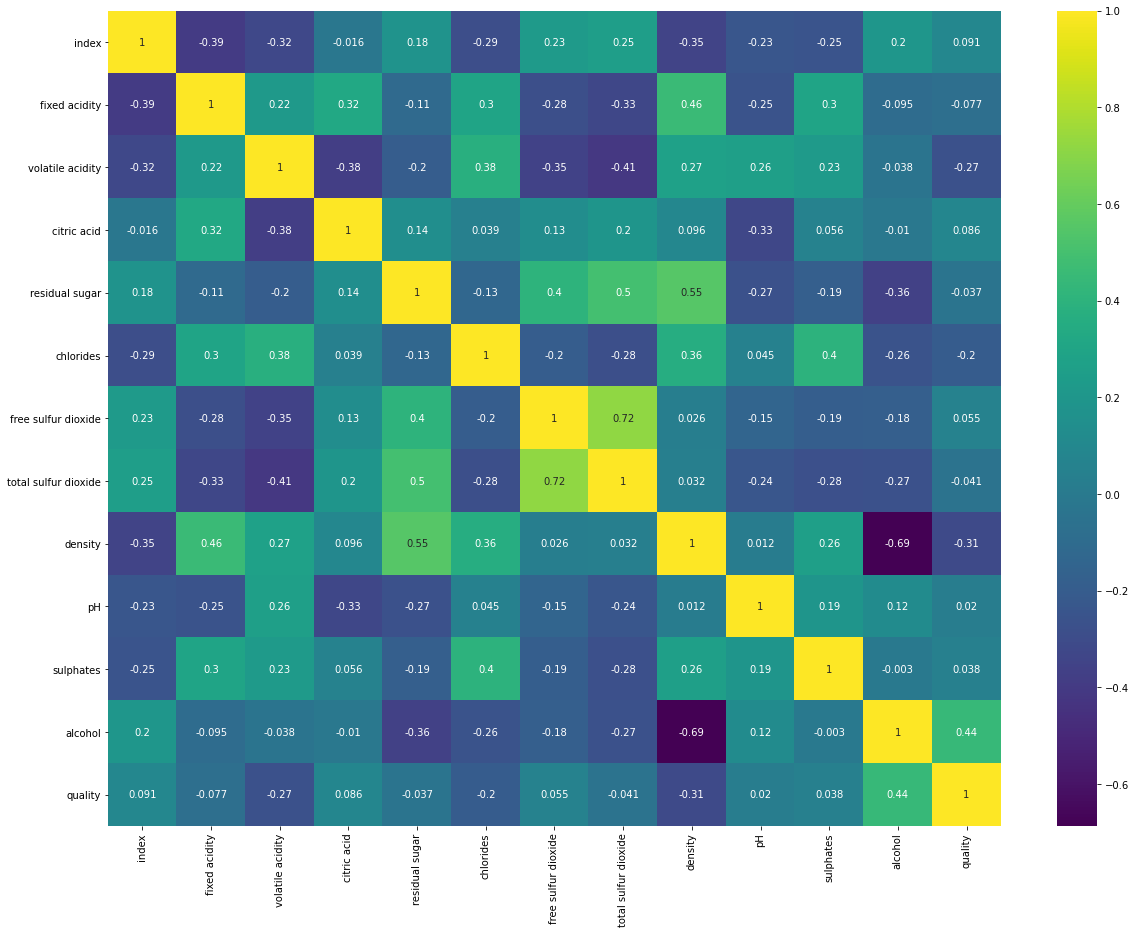

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='viridis')


/home/reza/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

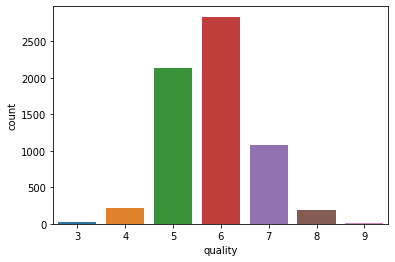

In [7]:


sns.countplot(df['quality'])



In [9]:
# input and output seperation
input_cols = list(df.columns)[:-1]
output_cols = ['quality']
X = df[input_cols].to_numpy()
y = df[output_cols].to_numpy()


# Split dataset to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)




y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Transforming arrays into tensors
Xtrain_torch = torch.Tensor(X_train.astype(np.float32))
Xtest_torch = torch.Tensor(X_test.astype(np.float32))
ytrain_torch = torch.Tensor(y_train.astype(np.float32))
ytest_torch = torch.Tensor(y_test.astype(np.float32))

# Create training dataset and data loader from tensors
train_df = torch.utils.data.TensorDataset(Xtrain_torch, ytrain_torch)
train_loader = torch.utils.data.DataLoader(train_df, batch_size=100, shuffle=True) 

# Create testing dataset and data loader from tensors
test_df = torch.utils.data.TensorDataset(Xtest_torch, ytest_torch)
test_loader = torch.utils.data.DataLoader(test_df, batch_size=100, shuffle=True)

In [10]:
#Create our Network model class
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.sigmoid = nn.Sigmoid()
        self.layer_1 = nn.Linear(12,30)
        self.layer_2 = nn.Linear(30,20)
        self.layer_3 = nn.Linear(20,10)
        
    def forward(self,x):
        x = self.sigmoid(self.layer_1(x))
        x2 = self.sigmoid(self.layer_2(x))
        out = self.layer_3(x2)
        return out

model = Network()
print(model)

Network(
  (sigmoid): Sigmoid()
  (layer_1): Linear(in_features=12, out_features=30, bias=True)
  (layer_2): Linear(in_features=30, out_features=20, bias=True)
  (layer_3): Linear(in_features=20, out_features=10, bias=True)
)


In [11]:
#Train the model and make predictions using the trained model

opt = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


rates = [0.1, 0.01, 0.001]

number_epoch = 1000

a_tr_loss = np.zeros([len(rates), number_epoch])
a_tr_accuracy = np.zeros([len(rates), number_epoch])
a_ts_loss = np.zeros([len(rates), number_epoch])
a_ts_accuracy = np.zeros([len(rates), number_epoch])
index = 1

for i,j in enumerate(rates):
    index = 0
    
    model = Network()
    opt = optim.Adam(model.parameters(), lr = j)
    
    for epoch in range(number_epoch):
        index = index + 1
        model.train() 
        correct = 0 
        total = 0
        batch_loss_tr = []
        
      
        for train_iter, data in enumerate(train_loader):
            x_batch,y_batch = data
            y_batch = y_batch.type(torch.long)
            out = model(x_batch)
            
            
            loss = criterion(out,y_batch)
            batch_loss_tr.append(loss.item())
            
            
            opt.zero_grad()
            loss.backward()
            
         
            opt.step()
            
          
            _, predicted = torch.max(out.data, 1)
            
           
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
        
        a_tr_loss[i, epoch] = np.mean(batch_loss_tr)
        a_tr_accuracy[i, epoch] = 100*correct/total
        
        
        model.eval()
        correct = 0 
        total = 0 
        batch_loss_ts = []
        
        with torch.no_grad():
            for data in test_loader:
                num, labels = data
                labels = labels.type(torch.long)
                outputs = model(num)
                batch_loss_ts.append(criterion(outputs,labels).item())
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
            
        a_ts_loss[i, epoch] = np.mean(batch_loss_ts)
        a_ts_accuracy[i, epoch] = 100*correct/total
  
        if index%50 == 0:
            print('Learning Rate: {0}  Epoch: {1:2d}   Train Loss: {2:.3f}   '.format(j, epoch+1, a_tr_loss[i, epoch])
                  +'Train Accuracy: {0:.2f}    Test Loss: {1:.3f}   '.format(a_tr_accuracy[i, epoch], a_ts_loss[i, epoch])
                  +'Test Accuracy: {0:.2f}'.format(a_ts_accuracy[i, epoch]))

/home/reza/.local/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


Learning Rate: 0.1  Epoch: 50   Train Loss: 1.290   Train Accuracy: 43.02    Test Loss: 1.292   Test Accuracy: 43.33
Learning Rate: 0.1  Epoch: 100   Train Loss: 1.286   Train Accuracy: 41.13    Test Loss: 1.288   Test Accuracy: 43.33
Learning Rate: 0.1  Epoch: 150   Train Loss: 1.295   Train Accuracy: 40.91    Test Loss: 1.298   Test Accuracy: 43.33
Learning Rate: 0.1  Epoch: 200   Train Loss: 1.283   Train Accuracy: 43.11    Test Loss: 1.305   Test Accuracy: 43.33
Learning Rate: 0.1  Epoch: 250   Train Loss: 1.284   Train Accuracy: 41.68    Test Loss: 1.285   Test Accuracy: 43.33
Learning Rate: 0.1  Epoch: 300   Train Loss: 1.284   Train Accuracy: 42.84    Test Loss: 1.282   Test Accuracy: 43.33
Learning Rate: 0.1  Epoch: 350   Train Loss: 1.284   Train Accuracy: 42.27    Test Loss: 1.303   Test Accuracy: 43.33
Learning Rate: 0.1  Epoch: 400   Train Loss: 1.275   Train Accuracy: 43.79    Test Loss: 1.288   Test Accuracy: 43.33
Learning Rate: 0.1  Epoch: 450   Train Loss: 1.287   Trai

Text(0, 0.5, 'Testing Accuracy')

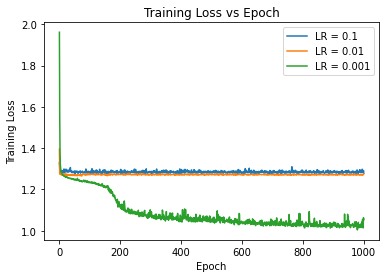

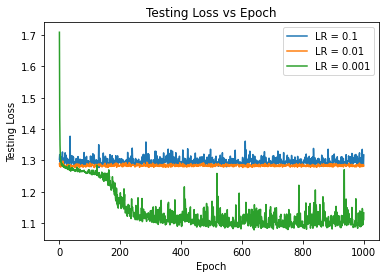

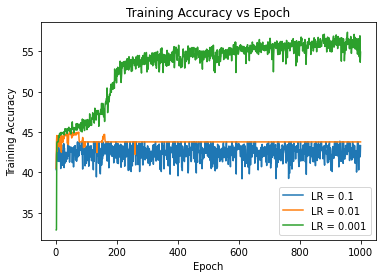

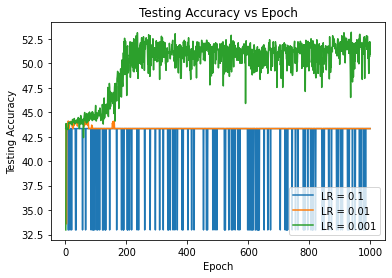

In [13]:
# Training Loss
plt.figure()
for i in range(len(rates)):
    plt.plot(range(1, number_epoch+1), a_tr_loss[i, :])
plt.legend(['LR = 0.1', 'LR = 0.01', 'LR = 0.001'])
plt.title('Training Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

# Testing Loss
plt.figure()
for i in range(len(rates)):
    plt.plot(range(1, number_epoch+1), a_ts_loss[i, :])
plt.legend(['LR = 0.1', 'LR = 0.01', 'LR = 0.001'])
plt.title('Testing Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Testing Loss')

# Training Accuracy
plt.figure()
for i in range(len(rates)):
    plt.plot(range(1, number_epoch+1), a_tr_accuracy[i, :])
plt.legend(['LR = 0.1', 'LR = 0.01', 'LR = 0.001' ])
plt.title('Training Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')

# Testing Accuracy
plt.figure()
for i in range(len(rates)):
    plt.plot(range(1, number_epoch+1), a_ts_accuracy[i, :])
plt.legend(['LR = 0.1', 'LR = 0.01', 'LR = 0.001'])
plt.title('Testing Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Testing Accuracy')